In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
def cal_perfstat(_df, cal_type):
    if cal_type == "ipc":
        _df["IPC"] = (_df["instructions"] / _df["cycles"])
    elif cal_type == "uop_ratio":
        _df["UOP_RATIO"] = (_df["uop_decoder"] / _df["instructions"])
    return _df

In [3]:
def do_df_parse(_df):
    _df_pivot = _df.pivot_table(values="counter_val",
                                columns=["counter_type"],
                                index=["window", "num_chunk"])
    _df_cal = cal_perfstat(_df_pivot, "ipc")
    _df_cal = cal_perfstat(_df_cal, "uop_ratio")
#     _chunk_sizes = _df["chunk_size"].drop_duplicates().to_numpy()
#     _chunk_sizes.sort()
#     return (_chunk_sizes, _df_cal)
    return _df_cal

## Window Size

In [4]:
ws_df = pd.read_csv('uop_reversing/test_1_window_220506113803_df.csv')

In [5]:
ws_df

,counter_type,counter_val,prog_type,arch_name,num_chunk,window
0,cycles,13846489343,first,hp-oldubuntu,1024,64
1,instructions,10426597120,first,hp-oldubuntu,1024,64
2,legacy_decoder,10427772049,first,hp-oldubuntu,1024,64
3,uop_decoder,65321,first,hp-oldubuntu,1024,64
4,cycles,13855701935,first,hp-oldubuntu,2048,32
...,...,...,...,...,...,...
139,uop_decoder,18094,first,hp-oldubuntu,4096,32
140,cycles,13823524477,first,hp-oldubuntu,8192,32
141,instructions,4180782020,first,hp-oldubuntu,8192,32
142,legacy_decoder,4181352418,first,hp-oldubuntu,8192,32


In [6]:
ws_df_parsed = do_df_parse(ws_df)

In [7]:
ws_df_parsed

counter_type           cycles  instructions  legacy_decoder  uop_decoder  \
window num_chunk                                                           
16     32         13846064716   21010977145        25787314  20986624704   
       64         13818942544   20516021606        23191981  20494249791   
       128        13838238688   21054899100        45719902  21010677517   
       256        13835009579   20369591273       241058193  20129924164   
       512        13841164866   19984411942     16985600154   3000233860   
       1024       13856521886   19555328379     19556340534       250287   
       2048       13864788149   19595572117     19596731613       109735   
       4096       13844868735   19395847261     19396698995        27787   
       8192       13852446382    4523372574      4523949645        15548   
32     32         13839935497   30019870243       850211247  29171084330   
       64         13849623526   30940758406         9013242  30933118161   
       128        13834210513   29121418712        18994989  29103920893   
       256        13850247036   23067652738        48158348  23020844554   
       512        13857011588   20909758590     19296893932   1614136012   
       1024       13837326898   20695597475     20695339680      1792690   
       2048       13855701935   20669431568     20670579152       197459   
       4096       13840698866   19519328386     19520141379        18094   
       8192       13823524477    4180782020      4181352418        12966   
64     32         13852015194   41422184530         9235895  41414480988   
       64         13770240926   39704494186        39228325  39668881966   
       128        13832147859   23099139571       151555762  22949157118   
       256        13839542910   20737774208     17251572595   3487577142   
       512        13840066277   20720817197     20595336023    127015976   
       1024       13846489343   10426597120     10427772049        65321   
       2048       13783646047    4502221733      4504116308        56522   
       4096       13850564460    3272846615      3273525759        13687   
       8192       13849564233    3295979152      3296563283        29661   
128    32         13300232755   31375167717        51048372  31337187094   
       64         13777030682   22370557356      1207351002  21167313092   
       128        13737182624   20460545833     16393879162   4069153473   
       256        13830050406   20704519212     20333281860    372901708   
       512        13842166192   10584073687     10585181037       127614   
       1024       13762981896    3471807535      3473257664        89991   
       2048       13845150920    2717394127      2718224081        38197   
       4096       13841722180    2502796317      2503519292        25131   
       8192       13838647071    2426526185      2427227531        37263   

counter_type           IPC     UOP_RATIO  
window num_chunk                          
16     32         1.517469  9.988410e-01  
       64         1.484630  9.989388e-01  
       128        1.521501  9.978997e-01  
       256        1.472322  9.882341e-01  
       512        1.443839  1.501287e-01  
       1024       1.411273  1.279892e-05  
       2048       1.413334  5.599990e-06  
       4096       1.400941  1.432626e-06  
       8192       0.326540  3.437258e-06  
32     32         2.169076  9.717259e-01  
       64         2.234051  9.997531e-01  
       128        2.105029  9.993991e-01  
       256        1.665505  9.979708e-01  
       512        1.508966  7.719534e-02  
       1024       1.495636  8.662180e-05  
       2048       1.491764  9.553190e-06  
       4096       1.410285  9.269786e-07  
       8192       0.302440  3.101334e-06  
64     32         2.990336  9.998140e-01  
       64         2.883355  9.991031e-01  
       128        1.669960  9.935070e-01  
       256        1.498444  1.681751e-01  
       512        1.497162  6.129873e-03  
       1024       0.753014  6.264844

Text(0, 0.5, 'UOP_RATIO')

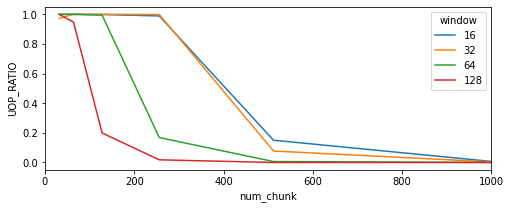

In [8]:
# Mentioned below is the link from where I got the graph done
# https://stackoverflow.com/a/25412939/13219331

ax = ws_df_parsed['UOP_RATIO'].unstack(level=0).plot(kind='line', rot=0, figsize=(8, 3))
plt.xlim(0, 1000)
plt.ylabel('UOP_RATIO')

# Line having the maximum drop is the window size

## Maximum Number of UOPS

In [81]:
nu_df = pd.read_csv('uop_reversing/test_4_numUop_220926093258_df.csv')

In [82]:
nu_df

,counter_type,counter_val,prog_type,arch_name,code_block_sz_1st,numuop
0,cycles,13713106546,first,hp-oldubuntu,1024,7
1,instructions,54306025802,first,hp-oldubuntu,1024,7
2,legacy_decoder,50565901,first,hp-oldubuntu,1024,7
3,uop_decoder,54262890515,first,hp-oldubuntu,1024,7
4,cycles,13658643060,first,hp-oldubuntu,32768,5
...,...,...,...,...,...,...
247,uop_decoder,53618336782,first,hp-oldubuntu,1024,5
248,cycles,13678735320,first,hp-oldubuntu,65536,10
249,instructions,49102951169,first,hp-oldubuntu,65536,10
250,legacy_decoder,49109984241,first,hp-oldubuntu,65536,10


In [83]:
a = []
for num in list(nu_df['code_block_sz_1st']):
    a.append(num)
a.sort()
a = list(set(a))
a.sort()
print(a)

[1024, 2048, 3072, 4096, 6144, 8192, 16384, 32768, 65536]


In [84]:
nu_df['numchunk'] = nu_df['code_block_sz_1st']/32
nu_df1 = nu_df.astype({'numchunk':'int'})

In [85]:
nu_df1

,counter_type,counter_val,prog_type,arch_name,code_block_sz_1st,numuop,numchunk
0,cycles,13713106546,first,hp-oldubuntu,1024,7,32
1,instructions,54306025802,first,hp-oldubuntu,1024,7,32
2,legacy_decoder,50565901,first,hp-oldubuntu,1024,7,32
3,uop_decoder,54262890515,first,hp-oldubuntu,1024,7,32
4,cycles,13658643060,first,hp-oldubuntu,32768,5,1024
...,...,...,...,...,...,...,...
247,uop_decoder,53618336782,first,hp-oldubuntu,1024,5,32
248,cycles,13678735320,first,hp-oldubuntu,65536,10,2048
249,instructions,49102951169,first,hp-oldubuntu,65536,10,2048
250,legacy_decoder,49109984241,first,hp-oldubuntu,65536,10,2048


In [86]:
fltr = [4, 5, 6]
nu_df2 = nu_df1[nu_df1['numuop'].isin(fltr)]

In [87]:
nu_df2

,counter_type,counter_val,prog_type,arch_name,code_block_sz_1st,numuop,numchunk
4,cycles,13658643060,first,hp-oldubuntu,32768,5,1024
5,instructions,40283844970,first,hp-oldubuntu,32768,5,1024
6,legacy_decoder,40142918467,first,hp-oldubuntu,32768,5,1024
7,uop_decoder,148348417,first,hp-oldubuntu,32768,5,1024
8,cycles,13635950877,first,hp-oldubuntu,2048,6,64
...,...,...,...,...,...,...,...
235,uop_decoder,376046,first,hp-oldubuntu,65536,5,2048
244,cycles,13628250257,first,hp-oldubuntu,1024,5,32
245,instructions,53667543850,first,hp-oldubuntu,1024,5,32
246,legacy_decoder,56147917,first,hp-oldubuntu,1024,5,32


In [88]:
def do_df_parse_nu(_df):
    _df_pivot = _df.pivot_table(values="counter_val",
                                columns=["counter_type"],
                                index=["numuop", "numchunk"])
    _df_cal = cal_perfstat(_df_pivot, "ipc")
    _df_cal = cal_perfstat(_df_cal, "uop_ratio")
    return _df_cal

In [89]:
nu_df_parsed = do_df_parse_nu(nu_df2)

In [90]:
nu_df_parsed

counter_type          cycles  instructions  legacy_decoder  uop_decoder  \
numuop numchunk                                                           
4      32        12691713444   48016287478        38072096  47983688555   
       64        13675059581   52757544535        50061446  52713790877   
       96        13679929830   50095415225        50151999  50051290971   
       128       13662596269   51124905579        62503516  51068628000   
       192       13691294353   43092220787       318265657  42778670674   
       256       13639457961   38596880322       611323522  37990474258   
       512       13652840075   34216950573     28168413283   6053210865   
       1024      13678289381   33682838674     33616257774     72280607   
       2048      13660582728   33342527236     33348311542       314899   
5      32        13628250257   53667543850        56147917  53618336782   
       64        13691814526   53886854502        60308488  53833022448   
       96        13648853764   53682814605        66775434  53623618800   
       128       13702899597   54275283893        52675192  54229940268   
       192       13659967586   51067094655       463119697  50609528083   
       256       13685603470   46858125030       450622265  46413242363   
       512       13685717904   40909780711     34856723809   6058578042   
       1024      13658643060   40283844970     40142918467    148348417   
       2048      13385932372   38995245737     39001218881       376046   
6      32        13552535599   53447919957        53335011  53401556925   
       64        13635950877   53992604908        49211798  53949186470   
       96        13672868815   53698328568       401239513  53302868014   
       128       13661146587   53609803348       534065880  53081524504   
       192       13553160628   40442134720     24418154099  16028278193   
       256       13651090944   38279452265     28242654815  10041488472   
       512       13654225987   33268045753     30585767707   2687110952   
       1024      13624675557   31437659261     31292243979    151254561   
       2048      13639404002   31288805267     31294370672       263934   

counter_type          IPC  UOP_RATIO  
numuop numchunk                       
4      32        3.783279   0.999321  
       64        3.857939   0.999171  
       96        3.661964   0.999119  
       128       3.741961   0.998899  
       192       3.147418   0.992724  
       256       2.829796   0.984289  
       512       2.506215   0.176907  
       1024      2.462504   0.002146  
       2048      2.440784   0.000009  
5      32        3.937963   0.999083  
       64        3.935699   0.999001  
       96        3.933137   0.998897  
       128       3.960861   0.999165  
       192       3.738449   0.991040  
       256       3.423899   0.990506  
       512       2.989232   0.148096  
       1024      2.949330   0.003683  
       2048      2.913151   0.000010  
6      32        3.943758   0.999133  
       64        3.959578   0.999196  
       96        3.927364   0.992636  
       128       3.924254   0.990146  
       192       2.983963   0.396326  
       256       2.804131   0.262321  
       512       2.436465   0.080772  
       1024      2.307406   0.004811  
       2048      2.294001   0.000008

Text(0, 0.5, 'UOP_RATIO')

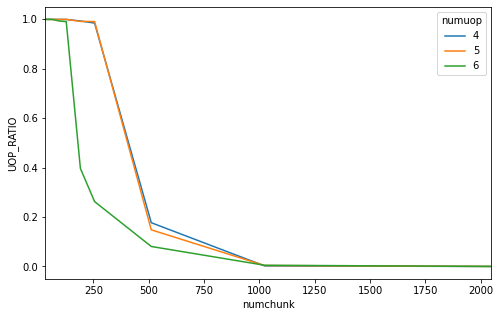

In [91]:
ax = nu_df_parsed['UOP_RATIO'].unstack(level=0).plot(kind='line', rot=0, figsize=(8, 5))
plt.xlim(32, 2048)
plt.ylabel('UOP_RATIO')

## Mapping Policy

In [152]:
def draw_heatmap(df_parsed, val_type, np_chunk_sizes):
    fig, axes = plt.subplots(len(np_chunk_sizes))
    fig.suptitle("%s"%(val_type))
    axes_list = axes.ravel()

    for chunk_size_idx, chunk_size in enumerate(np_chunk_sizes):
        ax = axes_list[chunk_size_idx]
        ax.set_title("%s"%(chunk_size))
        df_tmp = df_parsed.loc[chunk_size, :, :][val_type].unstack("set_size")
#         df_tmp = df_tmp.reset_index(level=['chunk_size'], drop=True)

        if (val_type == "UOP_RATIO"):
            sns.heatmap(df_tmp, cmap="YlGnBu", vmax=1, vmin=0, ax=ax, linewidths=.5,
                        cbar_kws={'label': 'UOP_RATIO'})
        else:
            sns.heatmap(df_tmp, cmap="YlGnBu", ax=ax, linewidths=.005,
                        cbar_kws={'label': val_type})
        ax.invert_yaxis()
    fig.tight_layout()

In [93]:
def cal_perfstat(_df, cal_type):
    if cal_type == "ipc":
        _df["IPC"] = (_df["instructions"] / _df["cycles"])
    elif cal_type == "uop_ratio":
        _df["UOP_RATIO"] = (_df["uop_decoder"] / _df["instructions"])
    return _df

def do_df_parse(_df):
    _df_pivot = _df.pivot_table(values="counter_val",
                                columns=["counter_type"],
                                index=["chunk_size", "way_size", "set_size"])
    _df_cal = cal_perfstat(_df_pivot, "ipc")
    _df_cal = cal_perfstat(_df_cal, "uop_ratio")
    _chunk_sizes = _df["chunk_size"].drop_duplicates().to_numpy()
    _chunk_sizes.sort()
    return (_chunk_sizes, _df_cal)

In [143]:
df = pd.read_csv("uop_reversing/test_4_mapping_221002092105_df.csv")
np_chunk_sizes, df_parsed = do_df_parse(df)

In [144]:
df_parsed

counter_type                      cycles  instructions  legacy_decoder  \
chunk_size way_size set_size                                             
16         1        1         4554779907   15805079070         7570965   
                    2         5458182023   21675726657         9119374   
                    3         5492112321   21816205072         9234565   
                    4         5498262957   20957581015      1048416674   
                    5         5507635056   20606629419      1747596694   
...                                  ...           ...             ...   
128        20       126       5460039258   21752858150        19130552   
                    127       5480022699   21783460228        10816671   
                    128       5518470659    1320284932      1320740020   
                    129       5529986860   21880376367        18464040   
                    130       5522187372   21974247265        27826047   

counter_type                  uop_decoder       IPC  UOP_RATIO  
chunk_size way_size set_size                                    
16         1        1         15798278660  3.469998   0.999570  
                    2         21668714457  3.971236   0.999676  
                    3         21809292630  3.972279   0.999683  
                    4         19911278706  3.811673   0.950075  
                    5         18860979607  3.741466   0.915287  
...                                   ...       ...        ...  
128        20       126       21735680730  3.984011   0.999210  
                    127       21774429287  3.975068   0.999585  
                    128             62606  0.239248   0.000047  
                    129       21863761757  3.956678   0.999241  
                    130       21948595765  3.979265   0.998833  

[10400 rows x 6 columns]

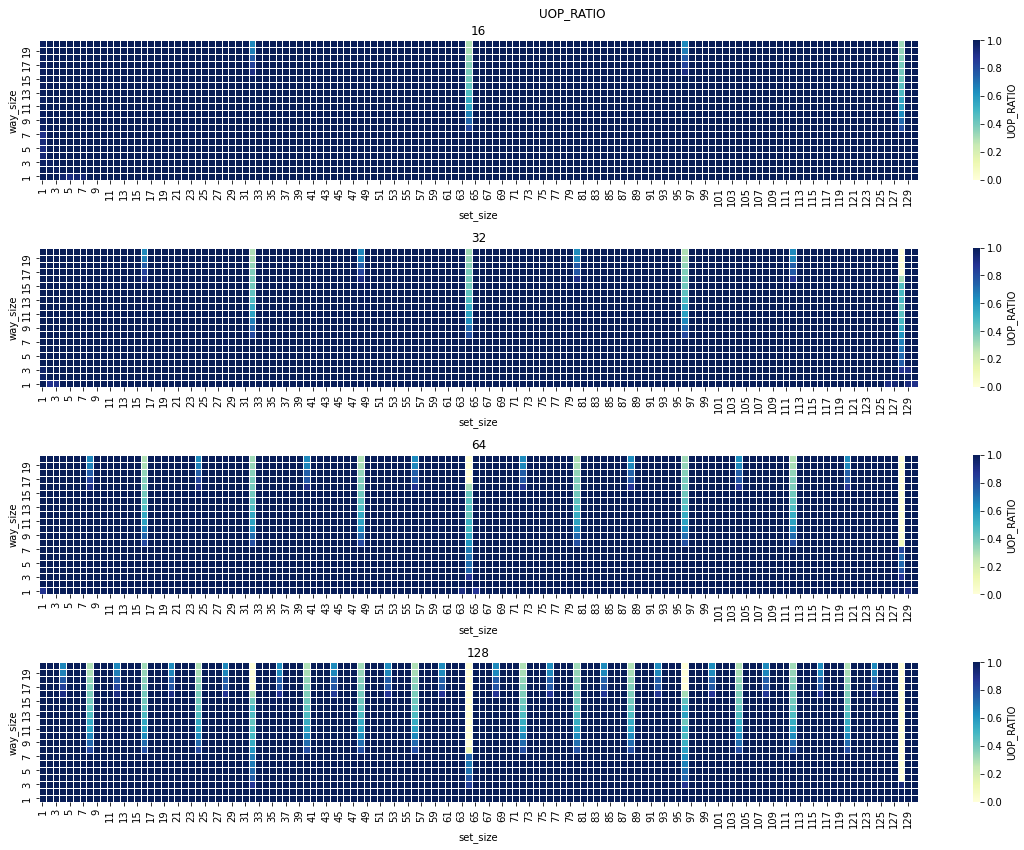

In [175]:
fig, axes = plt.subplots(len(np_chunk_sizes), figsize=(16, 12))
fig.suptitle("UOP_RATIO")
axes_list = axes.ravel()

for chunk_size_idx, chunk_size in enumerate(np_chunk_sizes):
    ax = axes_list[chunk_size_idx]
    ax.set_title("%s"%(chunk_size))

    df_tmp = df_parsed.loc[chunk_size, :, :]["UOP_RATIO"].unstack("set_size")
#     df_tmp = df_tmp.reset_index(level=['chunk_size'], drop=True)

    sns.heatmap(df_tmp, cmap="YlGnBu", vmax=1, vmin=0, ax=ax, linewidths=0.5,
                    cbar_kws={'label': 'UOP_RATIO'})
    ax.invert_yaxis()
    
fig.tight_layout()

/tmp/ipykernel_381904/1176448901.py:19: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  fig.tight_layout()


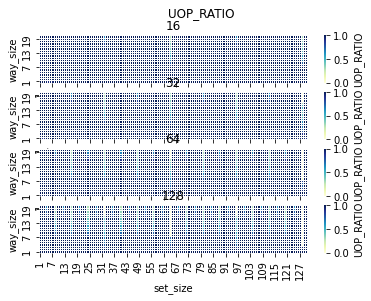

In [153]:
draw_heatmap(df_parsed, "UOP_RATIO", np_chunk_sizes)

In [141]:
df_tmp

set_size                  1         2         3         4         5    \
chunk_size way_size                                                     
16         1         0.999580  0.999606  0.999643  0.951914  0.976197   
           2         0.999453  0.993389  0.989580  0.999814  0.999605   
           3         0.996743  0.979431  0.999812  0.999379  0.999680   
           4         0.940689  0.999390  0.999748  0.999639  0.999674   
           5         0.969384  0.999426  0.999546  0.999742  0.999522   
           6         0.962461  0.999481  0.999549  0.999590  0.999459   
           7         0.937780  0.999812  0.999497  0.999346  0.999552   
           8         0.956776  0.999248  0.999696  0.999520  0.999630   
           9         0.978735  0.998228  0.999602  0.999519  0.999782   
           10        0.975600  0.999162  0.999400  0.999499  0.999469   
           11        0.989640  0.999746  0.999472  0.999541  0.999717   
           12        0.980920  0.999721  0.999636  0.999694  0.999803   
           13        0.986030  0.999737  0.999674  0.999393  0.999513   
           14        0.978152  0.999661  0.999665  0.999699  0.999587   
           15        0.984709  0.999577  0.999601  0.999727  0.999763   
           16        0.980341  0.999728  0.999635  0.999717  0.999778   
           17        0.981786  0.999696  0.999731  0.999336  0.999684   
           18        0.984341  0.999741  0.999475  0.999740  0.997813   
           19        0.989773  0.999762  0.999240  0.999734  0.999276   
           20        0.976811  0.999669  0.999686  0.999668  0.999636   
32         1         0.999631       NaN       NaN       NaN       NaN   
           2         0.984098       NaN       NaN       NaN       NaN   
           3         0.974350       NaN       NaN       NaN       NaN   
           4         0.999514       NaN       NaN       NaN       NaN   
           5         0.999793       NaN       NaN       NaN       NaN   
           6         0.999841       NaN       NaN       NaN       NaN   
           7         0.999310       NaN       NaN       NaN       NaN   
           8         0.999779       NaN       NaN       NaN       NaN   
           9         0.999439       NaN       NaN       NaN       NaN   
           10        0.999744       NaN       NaN       NaN       NaN   
           11        0.999842       NaN       NaN       NaN       NaN   
           12        0.999636       NaN       NaN       NaN       NaN   
           13        0.999586       NaN       NaN       NaN       NaN   
           14        0.997617       NaN       NaN       NaN       NaN   

set_size                  6         7         8         9         10   ...  \
chunk_size way_size                                                    ...   
16         1         0.976766  0.980308  0.999651  0.999743  0.999670  ...   
           2         0.999774  0.999730  0.999470  0.999559  0.999744  ...   
           3         0.999347  0.999624  0.999659  0.999628  0.999162  ...   
           4         0.999700  0.999476  0.999411  0.999538  0.999578  ...   
           5         0.999665  0.999601  0.999598  0.999772  0.999740  ...   
           6         0.999769  0.999702  0.999790  0.998614  0.999763  ...   
           7         0.999777  0.999440  0.999620  0.999270  0.999253  ...   
           8         0.999643  0.999548  0.999597  0.999735  0.999555  ...   
           9         0.999536  0.999601  0.997676  0.999474  0.999456  ...   
           10        0.999373  0.998795  0.999591  0.999694  0.999801  ...   
           11        0.999470  0.999365  0.999577  0.999709  0.999648  ...   
           12        0.999579  0.998380  0.999525  0.999763  0.999632  ...   
           13        0.999628  0.999377  0.999710  0.999450  0.999482  ...   
           14        0.999773  0.999755  0.999495  0.999740  0.999598  ...   
           15        0.999539  0.999519  0.999571  0.999629  0.999419  ...   
           16        0.999489  0.999432  0.99